# Métodos Numéricos: Entendiendo la Eficiencia de Algoritmos

## Introducción

En los métodos numéricos, la eficiencia de un algoritmo es crucial para resolver problemas a gran escala dentro de marcos de tiempo razonables y con limitaciones de recursos. Comprender la eficiencia de un algoritmo nos ayuda a elegir el método más apropiado para un problema dado, optimizar algoritmos existentes y predecir costos computacionales.

En este cuaderno, exploraremos:

- El concepto de eficiencia de algoritmos y la notación Big O.
- Cómo medir el tiempo de ejecución en Python.
- Un estudio de caso comparando diferentes algoritmos para resolver sistemas lineales.
- Visualización del tiempo de ejecución versus el tamaño del problema.
- Discusión sobre consideraciones de uso de memoria.

---

## 1. Complejidad Temporal y Notación Big O

### Introducción

La **complejidad temporal** de un algoritmo es una medida teórica que describe la cantidad de tiempo que un algoritmo tarda en ejecutarse en función del tamaño de la entrada. Es una herramienta fundamental en informática y matemáticas para analizar y comparar la eficiencia de diferentes algoritmos.

La **notación Big O** es una notación matemática utilizada para describir el comportamiento asintótico de funciones. En el contexto de algoritmos, se utiliza para clasificar el tiempo de ejecución o uso de recursos en función del tamaño de la entrada.

---

### Conceptos Clave

#### 1.1. Comportamiento Asintótico

El comportamiento asintótico se refiere al análisis del rendimiento de un algoritmo cuando el tamaño de la entrada tiende a infinito. Nos permite enfocarnos en la tendencia general y no en detalles específicos para entradas pequeñas.

#### 1.2. Funciones de Complejidad Comunes

- **O(1) - Tiempo Constante**: El tiempo de ejecución no depende del tamaño de la entrada.
- **O(log n) - Tiempo Logarítmico**: El tiempo de ejecución crece proporcionalmente al logaritmo del tamaño de la entrada.
- **O(n) - Tiempo Lineal**: El tiempo de ejecución crece linealmente con el tamaño de la entrada.
- **O(n log n) - Tiempo Lineal-Logarítmico**: Combinación de lineal y logarítmico, común en algoritmos de ordenamiento eficientes.
- **O(n²) - Tiempo Cuadrático**: El tiempo de ejecución es proporcional al cuadrado del tamaño de la entrada, típico en algoritmos con bucles anidados.
- **O(2ⁿ) - Tiempo Exponencial**: El tiempo de ejecución se duplica con cada incremento en el tamaño de la entrada; ineficiente para grandes n.

---

### Notación Big O

La notación Big O formaliza el límite superior del crecimiento de una función. Decimos que una función f(n) es O(g(n)) si existen constantes positivas **c** y **n₀** tales que:

$$
0 \leq f(n) \leq c \cdot g(n) \quad \text{para todo} \ n \geq n₀
$$

Esto implica que, para valores suficientemente grandes de n, f(n) no crece más rápido que g(n), excepto por un factor constante.

---

### Ejemplos Detallados

#### 1.3. Tiempo Constante - O(1)

El tiempo de ejecución es independiente del tamaño de la entrada.

**Ejemplo:**

Acceder a un elemento específico en un array.

```python
def obtener_elemento(array, índice):
    return array[índice]
```

**Análisis:**

La operación de acceso directo en un array es constante, sin importar cuántos elementos tenga el array.

---

#### 1.4. Tiempo Logarítmico - O(log n)

El tiempo de ejecución aumenta logarítmicamente con el tamaño de la entrada. Cada paso reduce la cantidad de datos a la mitad.

**Ejemplo:**

Búsqueda binaria en un array ordenado.

```python
def búsqueda_binaria(array, objetivo):
    izquierda = 0
    derecha = len(array) - 1
    while izquierda <= derecha:
        medio = (izquierda + derecha) // 2
        if array[medio] == objetivo:
            return medio
        elif array[medio] < objetivo:
            izquierda = medio + 1
        else:
            derecha = medio - 1
    return -1
```

**Análisis:**

En cada iteración, el espacio de búsqueda se reduce a la mitad, resultando en un máximo de log₂(n) iteraciones.

---

#### 1.5. Tiempo Lineal - O(n)

El tiempo de ejecución es directamente proporcional al tamaño de la entrada.

**Ejemplo:**

Encontrar el elemento máximo en una lista.

```python
def encontrar_máximo(lista):
    máximo = lista[0]
    for elemento en lista:
        if elemento > máximo:
            máximo = elemento
    return máximo
```

**Análisis:**

Se recorre cada elemento una vez, realizando una comparación por elemento.

---

#### 1.6. Tiempo Lineal-Logarítmico - O(n log n)

Combinación de comportamiento lineal y logarítmico. Común en algoritmos de ordenamiento eficientes.

**Ejemplo:**

Ordenamiento por mezcla (Merge Sort).

<p align="center">
<image src="amerge-sort-algorithm.png.webp" alt="Descripción de la imagen">
</p>

```python
def merge_sort(lista):
    if len(lista) > 1:
        medio = len(lista) // 2
        izquierda = lista[:medio]
        derecha = lista[medio:]
        merge_sort(izquierda)
        merge_sort(derecha)
        i = j = k = 0
        while i < len(izquierda) and j < len(derecha):
            if izquierda[i] < derecha[j]:
                lista[k] = izquierda[i]
                i += 1
            else:
                lista[k] = derecha[j]
                j += 1
            k += 1
        while i < len(izquierda):
            lista[k] = izquierda[i]
            i += 1
            k += 1
        while j < len(derecha):
            lista[k] = derecha[j]
            j += 1
            k += 1
```

**Análisis:**

Divide la lista repetidamente (log n) y combina las sublistas (n), resultando en O(n log n).

---

#### 1.7. Tiempo Cuadrático - O(n²)

El tiempo de ejecución es proporcional al cuadrado del tamaño de la entrada.

**Ejemplo:**

Ordenamiento por burbuja.

```python
def ordenamiento_burbuja(lista):
    n = len(lista)
    for i in range(n):
        for j in range(0, n - i - 1):
            if lista[j] > lista[j + 1]:
                lista[j], lista[j + 1] = lista[j + 1], lista[j]
```

**Análisis:**

Dos bucles anidados que recorren la lista, resultando en n * n = n² iteraciones.

---

#### 1.8. Tiempo Exponencial - O(2ⁿ)

El tiempo de ejecución se duplica con cada incremento en el tamaño de la entrada.

**Ejemplo:**

Resolución de problemas combinatorios, como el cálculo de todos los subconjuntos de un conjunto.

```python
def generar_subconjuntos(conjunto):
    if not conjunto:
        return [[]]
    elemento = conjunto[0]
    sin_elemento = generar_subconjuntos(conjunto[1:])
    con_elemento = [ [elemento] + subconjunto for subconjunto in sin_elemento ]
    return sin_elemento + con_elemento
```

**Análisis:**

El número de subconjuntos de un conjunto de tamaño n es 2ⁿ.

---

### Reglas para Calcular la Complejidad

- **Regla de la Suma:** Si un algoritmo realiza una secuencia de pasos, la complejidad total es la suma de las complejidades de cada paso.

  $$
  O(f(n)) + O(g(n)) = O(\max(f(n), g(n)))
  $$

- **Regla del Producto:** Para bucles anidados, la complejidad es el producto de las complejidades de cada bucle.

  $$
  O(n) \times O(n) = O(n^2)
  $$

#### 1.10. Ignorar Constantes y Términos de Menor Orden

En notación Big O, se omiten constantes multiplicativas y términos de menor grado porque el comportamiento asintótico se centra en el crecimiento dominante.

- O(3n) se simplifica a O(n)
- O(n + log n) se simplifica a O(n)
- O(n² + n) se simplifica a O(n²)

---

### Importancia en Métodos Numéricos

En métodos numéricos, la complejidad temporal es crucial debido a:

- **Escalabilidad:** Al trabajar con grandes conjuntos de datos o matrices, un aumento en la complejidad puede hacer que un algoritmo sea impracticable.
- **Optimización:** Permite identificar partes del algoritmo que pueden mejorarse.
- **Comparación de Algoritmos:** Facilita la elección del algoritmo más eficiente para un problema dado.

**Ejemplo en Métodos Numéricos:**

- **Eliminación Gaussiana:** Tiene complejidad O(n³), lo que la hace ineficiente para matrices muy grandes.
- **Métodos Iterativos:** Como el método de Jacobi o Gradiente Conjugado, pueden ser más eficientes para matrices dispersas de gran tamaño.

---

### Cómo Realizar el Análisis de Complejidad

1. **Identificar las Operaciones Básicas:**
   - Las que más contribuyen al tiempo total.
2. **Contar el Número de Veces que se Ejecutan:**
   - En función del tamaño de la entrada n.
3. **Expresar el Tiempo Total:**
   - Como una función matemática de n.
4. **Simplificar Usando Notación Big O:**
   - Mantener solo el término de mayor grado.

---

### Limitaciones de la Notación Big O

- **No Indica el Tiempo Exacto de Ejecución:** Solo proporciona una cota superior.
- **No Considera Constantes Ocultas:** Las constantes pueden ser significativas en la práctica.
- **Asume que Todas las Operaciones Toman el Mismo Tiempo:** Lo cual puede no ser cierto en sistemas reales.

---

## 2. Midiendo el Tiempo de Ejecución en Python

Python proporciona el módulo `timeit` para medir el tiempo de ejecución de pequeños fragmentos de código.

### Ejemplo: Midiendo el Tiempo para una Función Simple

In [5]:
import timeit

# Definir una función simple
def bucle_simple(n):
    total = 0
    for i in range(n):
        total += i
    return total

# Medir el tiempo de ejecución
n = 1000000
tiempo_ejecucion = timeit.timeit(lambda: bucle_simple(n), number=10)
print(f"Tiempo promedio de ejecución en 10 ejecuciones: {tiempo_ejecucion / 10:.6f} segundos")

n = 10000000
tiempo_ejecucion = timeit.timeit(lambda: bucle_simple(n), number=10)
print(f"Tiempo promedio de ejecución en 10 ejecuciones: {tiempo_ejecucion / 10:.6f} segundos")

n = 100000000
tiempo_ejecucion = timeit.timeit(lambda: bucle_simple(n), number=10)
print(f"Tiempo promedio de ejecución en 10 ejecuciones: {tiempo_ejecucion / 10:.6f} segundos")

Tiempo promedio de ejecución en 10 ejecuciones: 0.026834 segundos
Tiempo promedio de ejecución en 10 ejecuciones: 0.260908 segundos
Tiempo promedio de ejecución en 10 ejecuciones: 2.594297 segundos


---

## 3. Caso de Estudio: Resolviendo Sistemas Lineales

Consideremos resolver el sistema lineal **Ax = b**, donde **A** es una matriz **n x n**, y **b** es un vector de tamaño **n**.

### 3.2 Métodos:

- **Eliminación Gaussiana**: Método directo con complejidad temporal **O(n³)**.
- **Descomposición LU**: Factoriza la matriz **A** en matrices **L** y **U**.
- **Métodos Iterativos**: Como los métodos de Jacobi o Gauss-Seidel, útiles para matrices grandes y dispersas.

### Implementación y Comparación:

In [2]:
import numpy as np
from scipy.linalg import lu_solve, lu_factor
from scipy.sparse import diags
from scipy.sparse.linalg import cg  # Método del Gradiente Conjugado
import time

# Función para resolver usando Eliminación Gaussiana (np.linalg.solve)
def resolver_gaussiana(A, b):
    return np.linalg.solve(A, b)

# Función para resolver usando Descomposición LU
def resolver_lu(A, b):
    lu, piv = lu_factor(A)
    return lu_solve((lu, piv), b)

# Función para resolver usando Método Iterativo (Gradiente Conjugado)
def resolver_iterativo(A, b):
    x, info = cg(A, b)
    return x

---

### 3.2 Grafica del Tiempo de Ejecución vs. Tamaño del Problema

Vamos a medir y graficar el tiempo de ejecución de estos métodos para diferentes tamaños de **n**.

### Código:

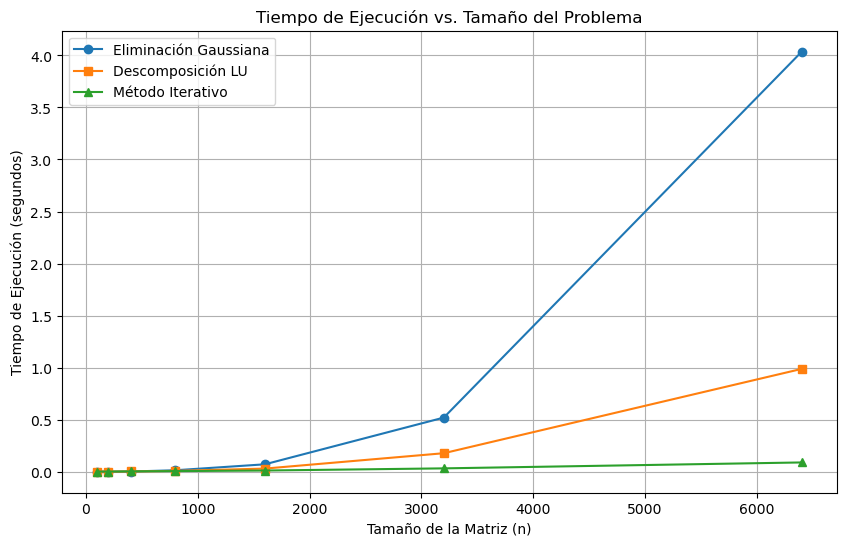

In [7]:
import matplotlib.pyplot as plt

# Tamaños del problema
valores_n = [100, 200, 400, 800, 1600, 3200, 6400]

tiempos_gaussiana = []
tiempos_lu = []
tiempos_iterativo = []

for n in valores_n:
    # Crear una matriz y vector aleatorios
    A = np.random.rand(n, n)
    b = np.random.rand(n)

    # Medir tiempo de Eliminación Gaussiana
    inicio = time.time()
    resolver_gaussiana(A, b)
    tiempos_gaussiana.append(time.time() - inicio)

    # Medir tiempo de Descomposición LU
    inicio = time.time()
    resolver_lu(A, b)
    tiempos_lu.append(time.time() - inicio)

    # Medir tiempo del Método Iterativo (usando una matriz dispersa diagonal para eficiencia)
    diagonales = [np.ones(n-1), np.ones(n), np.ones(n-1)]
    A_dispersa = diags(diagonales, offsets=[-1, 0, 1])
    b_dispersa = np.ones(n)

    inicio = time.time()
    resolver_iterativo(A_dispersa, b_dispersa)
    tiempos_iterativo.append(time.time() - inicio)

# Graficando
plt.figure(figsize=(10, 6))
plt.plot(valores_n, tiempos_gaussiana, 'o-', label='Eliminación Gaussiana')
plt.plot(valores_n, tiempos_lu, 's-', label='Descomposición LU')
plt.plot(valores_n, tiempos_iterativo, '^-', label='Método Iterativo')
plt.xlabel('Tamaño de la Matriz (n)')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.title('Tiempo de Ejecución vs. Tamaño del Problema')
plt.legend()
plt.grid(True)
plt.show()

### Interpretación:

- La **Eliminación Gaussiana** y la **Descomposición LU** tienen tiempos de ejecución que aumentan rápidamente con **n**.
- Los **Métodos Iterativos** escalan mejor para grandes valores de **n**, especialmente al tratar con matrices dispersas.

---